In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Slightly different theme
sns.set_style("whitegrid")


In [4]:
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

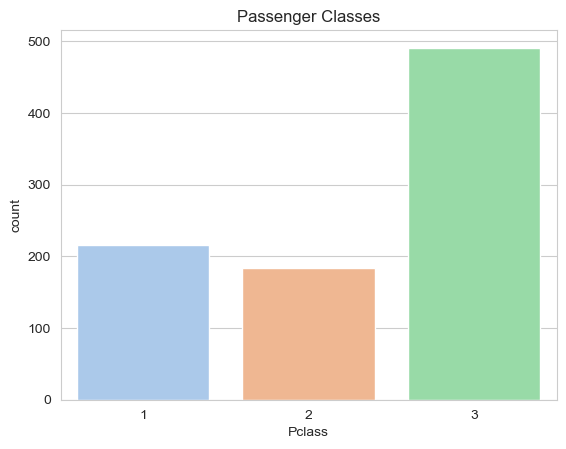

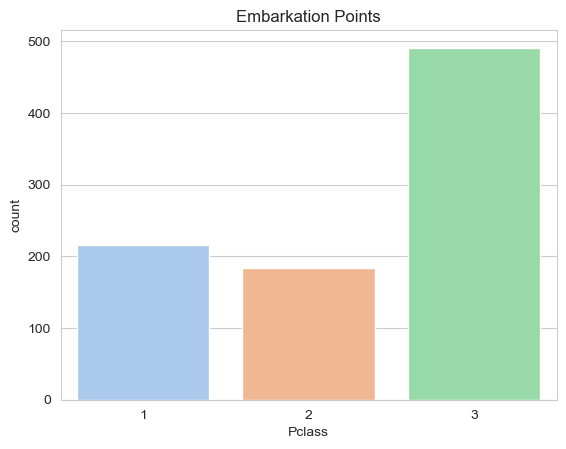

In [10]:
# Bar charts of categorical columns
sns.countplot(data=df, x='Pclass', hue='Pclass', palette='pastel', legend=False)

plt.title("Passenger Classes")
plt.show()

sns.countplot(data=df, x='Pclass', hue='Pclass', palette='pastel', legend=False)

plt.title("Embarkation Points")
plt.show()


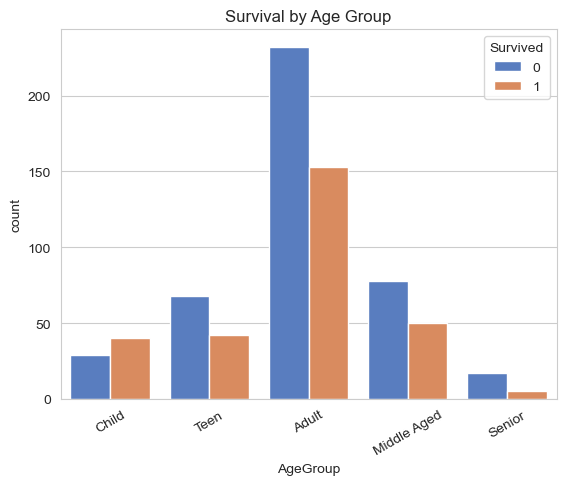

In [12]:
# Create age bins
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 20, 40, 60, 80], 
                        labels=["Child", "Teen", "Adult", "Middle Aged", "Senior"])

# Survival by Age Group
sns.countplot(data=df, x="AgeGroup", hue="Survived", palette="muted")
plt.title("Survival by Age Group")
plt.xticks(rotation=30)
plt.show()


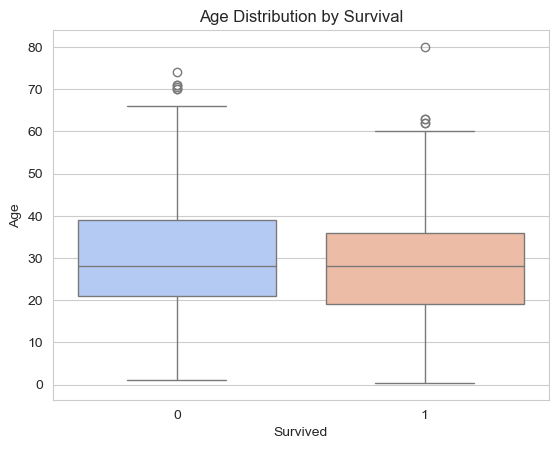

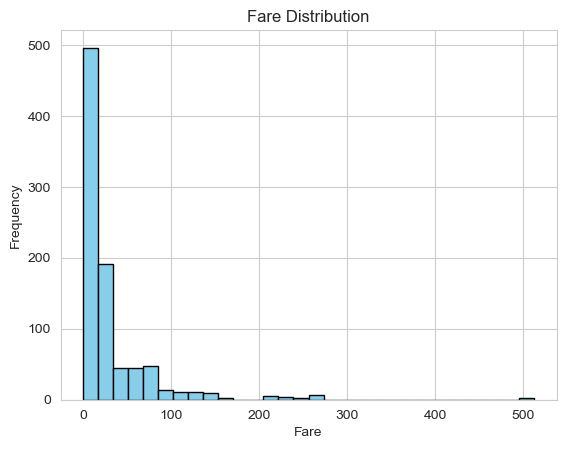

In [22]:
sns.boxplot(data=df, x="Survived", y="Age", hue="Survived", palette="coolwarm", legend=False)
plt.title("Age Distribution by Survival")
plt.show()

df["Fare"].plot.hist(bins=30, color="skyblue", edgecolor="black")
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()


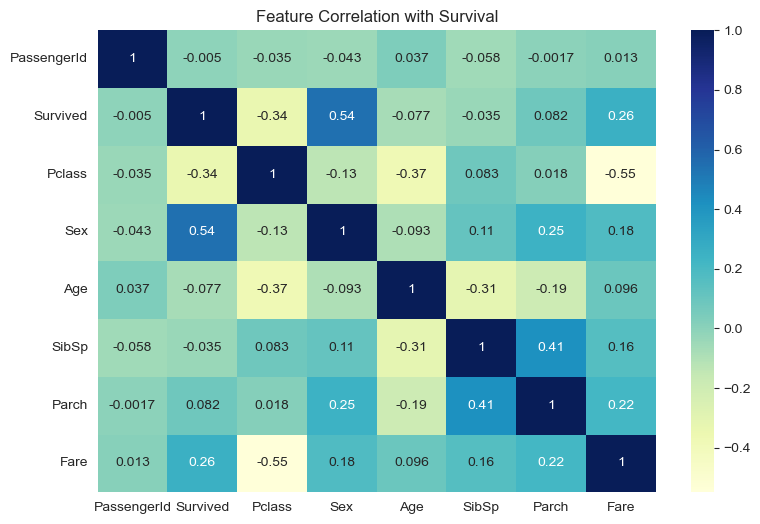

In [16]:
# Convert Sex to numeric, drop non-numeric
df_corr = df.copy()
df_corr["Sex"] = df_corr["Sex"].map({"male": 0, "female": 1})
df_corr = df_corr.select_dtypes(include=["number"])

plt.figure(figsize=(9,6))
sns.heatmap(df_corr.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation with Survival")
plt.show()


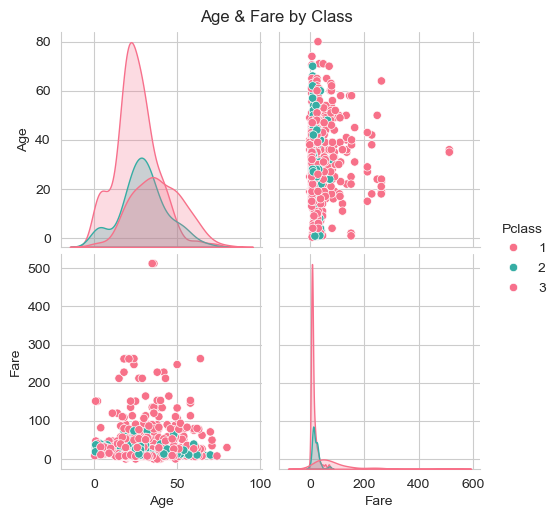

In [18]:
sns.pairplot(df, vars=["Age", "Fare"], hue="Pclass", palette="husl")
plt.suptitle("Age & Fare by Class", y=1.02)
plt.show()


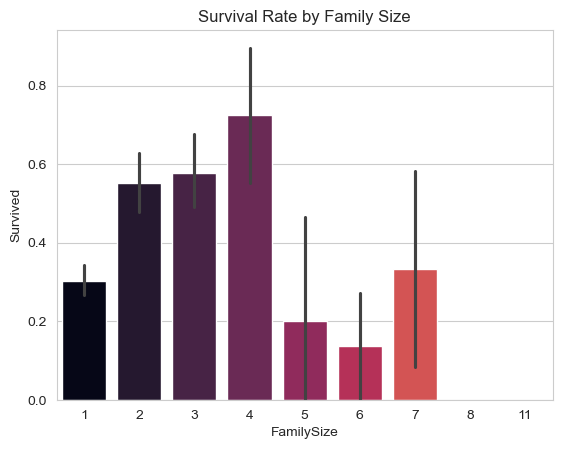

In [24]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

sns.barplot(data=df, x="FamilySize", y="Survived", hue="FamilySize", palette="rocket", legend=False)
plt.title("Survival Rate by Family Size")
plt.show()
